The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


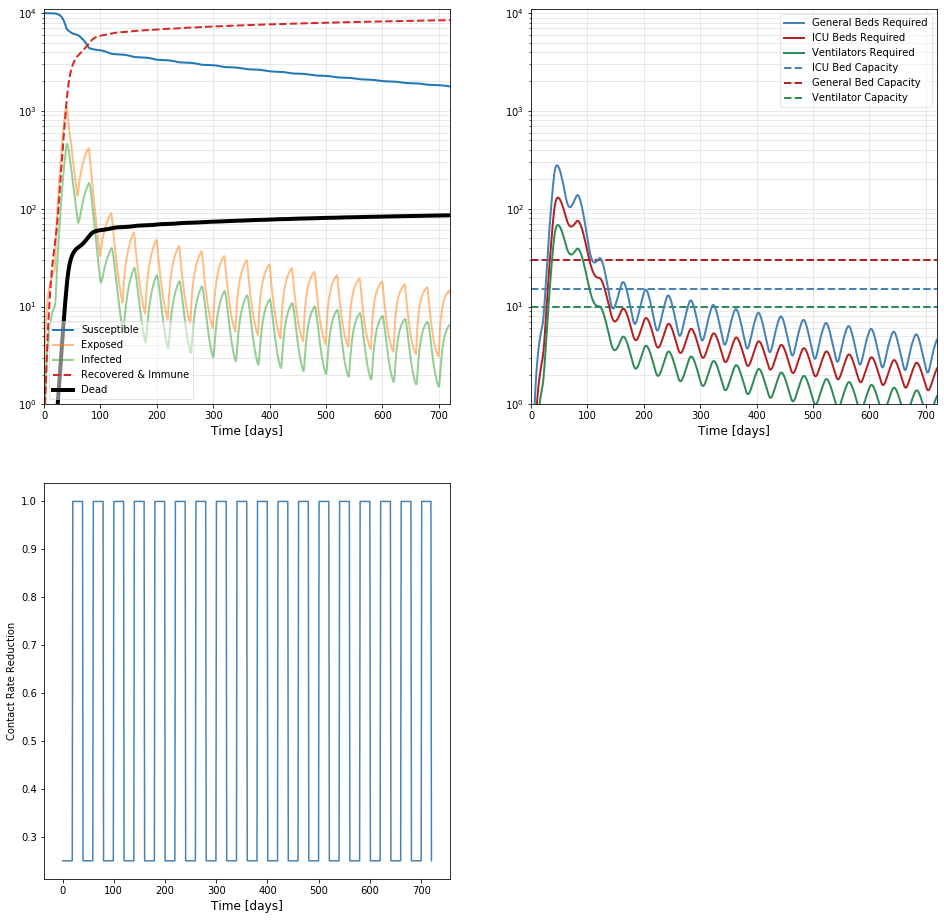

In [123]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('~/county_covid_seir_models/')

import numpy as np
from pyseir.models.seir_model import SEIRModel
from pyseir.models.supression_policies import generate_triggered_suppression_model

t_list = np.linspace(0, 720, 720)


model = SEIRModel(
    N=10000,
    t_list=t_list,
    suppression_policy=generate_supression_model_rho(
        t_list=t_list,
        lockdown_days=20, open_days=20
    )
)

model.run()
model.plot_results()